Matplotlib is building the font cache; this may take a moment.


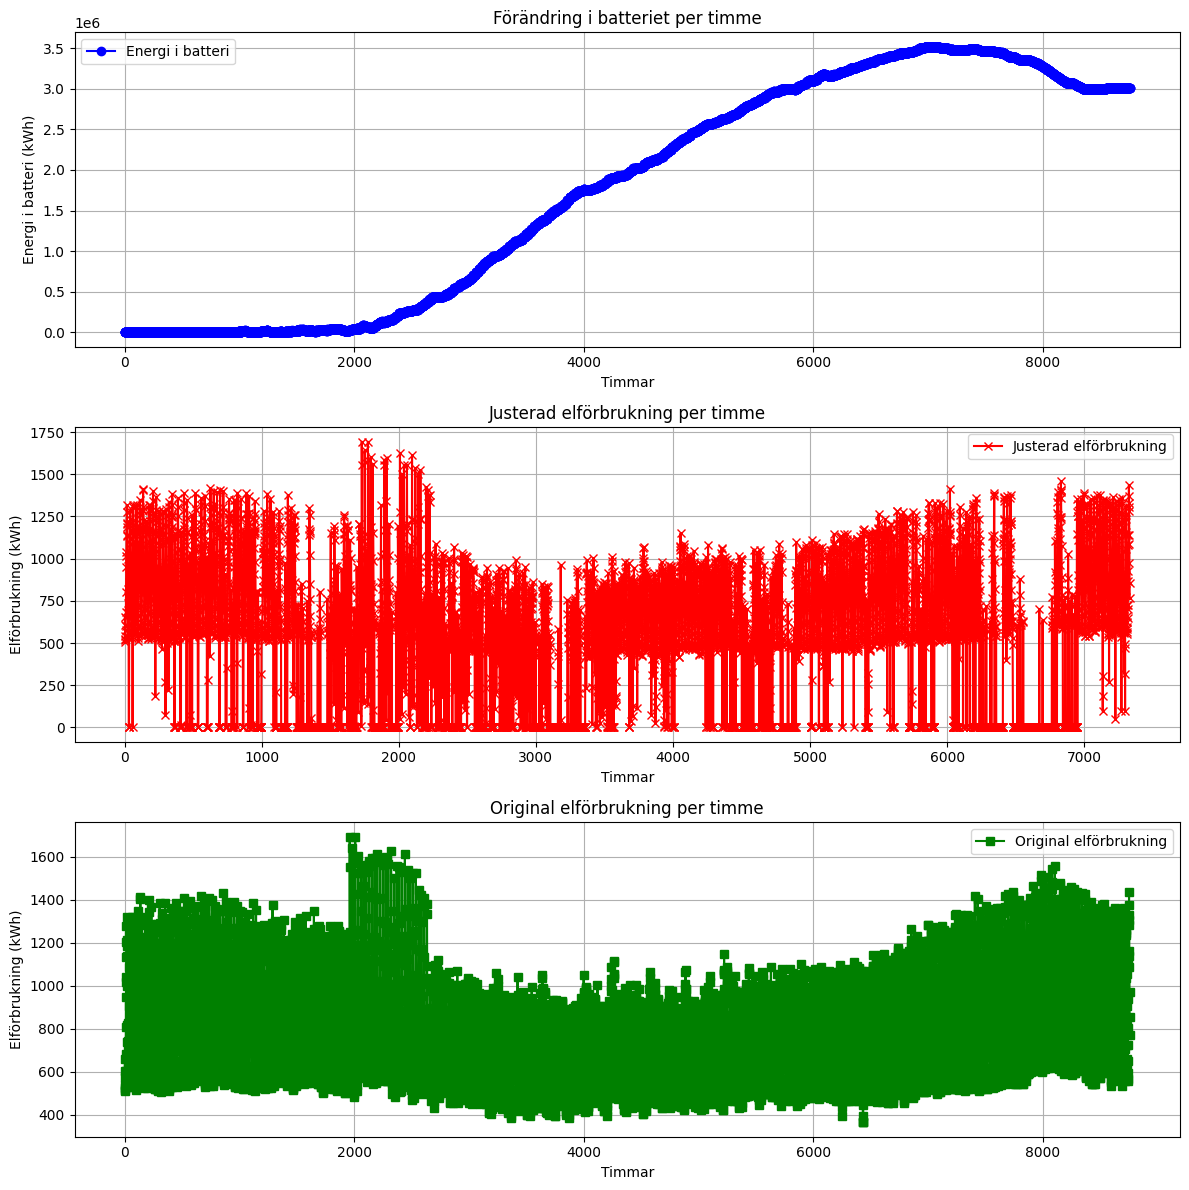

Summa Spotpris 2023: 5689306.300100008
Summa spotpris k칬pt el med batteri:  [1997161.21624799]
Besparingar i spotpris(i kr)m.h.a sol och batteri: [3692145.08385201]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel files
Solprod = pd.read_excel("SolprodABK.xlsx")
ABKEl = pd.read_excel("ABKEL.xlsx")
Spotpris = pd.read_excel("Spotpris.xlsx")

# Extract first columns from each
Sol = Solprod.iloc[:, 0]  # First column of Solprod
ABK = ABKEl.iloc[:, 0]    # First column of ABKEl
Spot = Spotpris.iloc[:, 0]    # First column of Spotpris

# Initialize Batteri
batteriKapacitet = 0.0
K칬ptElSpotpris = 0.0
SummaSpotpris2023 = 0.0

for i in range(len(Spot)):
    SummaSpotpris2023 += Spot[i]*ABK[i]

SummaSpotpris2023 = SummaSpotpris2023/100


# List to store battery and elf칬rbrukning for plotting
elf칬rbrukning = []
battery_values = []
original_consumption = ABK.tolist()

# Iterate through the columns
for i in range(len(Sol)):
    diff = ABK[i] - Sol[i] #Differens elf칬rbrukning solproduktion varje timme

    # Update Batteri based on the conditions
    if  Spot[i] <= 35 and Sol[i] > 0: #Lagra solel om spotpris 칛r l칛gre 칛n 35 칬re/kWh
        batteriKapacitet += Sol[i]
        K칬ptElSpotpris += (Spot[i]*ABK[i]) #Spotpris per kWh el l칛ggs till i summa
        elf칬rbrukning.append(ABK[i])
    elif Spot[i] > 35 and Spot[i] < 100 and Sol[i] > 0 and diff > 0: #Om spotpriset 칛r st칬rre 칛n 35, men mindre 칛n 100, och sol-el finns men elf칬rbr. st칬rre
        K칬ptElSpotpris += [Spot[i]*diff] #Differensen el k칬ps i spotpris och l칛ggs till i summa
        elf칬rbrukning.append(diff)
    elif Spot[i] >= 100 and Sol[i] > 0 and diff > 0 and batteriKapacitet > 0: #Om spotpriset 칛r st칬rre 칛n 100 och solprod och batteriel finns
        energiFr친nBatteri = min(batteriKapacitet, diff) #Tar minsta v칛rdet mellan energin i batteriet och diff
        batteriKapacitet -= energiFr친nBatteri #Subtraherar energifr친n batteriet
        K칬ptElSpotpris += (diff - energiFr친nBatteri)*Spot[i] #K칬per restel, om "diff" 칛r st칬rre 칛n "batteriKapacitet"
        elf칬rbrukning.append(diff- energiFr친nBatteri)
    elif Spot[i] > 35 and Sol[i] > 0 and diff < 0: #Om spotpris 칛r st칬rre 칛n 35 칬re och solel finns och 칛r st칬rre 칛n elf칬rbrukning
        batteriKapacitet += (-1*diff) #Lagra solel칬verskottet
    elif Sol[i] == 0 and batteriKapacitet > 0 and Spot[i] >= 100: #Om ingen solel och spotpriset 칛r h칬gre 칛n 100 칬re och batteriel finns
        energiFr친nBatteri = min(batteriKapacitet, ABK[i]) #Tar l칛gsta v칛rdet mellan elf칬rbr. f칬r timmen och energisumman i batteriet, s칛kerst칛ller att batteriet aldrig blir negativt
        batteriKapacitet -= energiFr친nBatteri #Subtraherar energi fr친n batteriet
        K칬ptElSpotpris += (ABK[i] - energiFr친nBatteri)*Spot[i] #K칬per restelen (Om elf칬rbrukningen blir minsta k칬ps allts친 ingen, ABK[i]-ABK[i])
        elf칬rbrukning.append(ABK[i]- energiFr친nBatteri)
    else: 
        K칬ptElSpotpris += (ABK[i]*Spot[i]) #I alla andra fall k칬ps elen till spotpris
        elf칬rbrukning.append(ABK[i])


 # Store the updated Batteri value for plotting
    battery_values.append(batteriKapacitet)


# Create subplots to display three graphs
fig, ax = plt.subplots(3, 1, figsize=(12, 12))  # 3 rows, 1 column

# Plot Battery Energy
ax[0].plot(range(len(battery_values)), battery_values, label='Energi i batteri', color='blue', marker='o')
ax[0].set_xlabel('Timmar')
ax[0].set_ylabel('Energi i batteri (kWh)')
ax[0].set_title('F칬r칛ndring i batteriet per timme')
ax[0].legend()
ax[0].grid(True)

# Plot Adjusted Electricity Consumption
ax[1].plot(range(len(elf칬rbrukning)), elf칬rbrukning, label='Justerad elf칬rbrukning', color='red', marker='x')
ax[1].set_xlabel('Timmar')
ax[1].set_ylabel('Elf칬rbrukning (kWh)')
ax[1].set_title('Justerad elf칬rbrukning per timme')
ax[1].legend()
ax[1].grid(True)

# Plot Original Electricity Consumption (ABK)
ax[2].plot(range(len(original_consumption)), original_consumption, label='Original elf칬rbrukning', color='green', marker='s')
ax[2].set_xlabel('Timmar')
ax[2].set_ylabel('Elf칬rbrukning (kWh)')
ax[2].set_title('Original elf칬rbrukning per timme')
ax[2].legend()
ax[2].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

k칬ptEliKr = K칬ptElSpotpris/100
# Printar summan spotpris och j칛mf칬r med originalpriset
print("Summa Spotpris 2023:", SummaSpotpris2023)
print("Summa spotpris k칬pt el med batteri: ", k칬ptEliKr)
print("Besparingar i spotpris(i kr)m.h.a sol och batteri:", SummaSpotpris2023 - k칬ptEliKr)

Original elf칬rbrukning topptimmar:     Timme  Elf칬rbrukning
0    2008        1693.00
1    1960        1693.00
2    1984        1641.00
3    2321        1627.00
4    2201        1614.00
5    2441        1611.00
6    2032        1602.00
7    2273        1596.00
8    2177        1594.00
9    2152        1593.00
10   2009        1586.00
11   2128        1580.00
12   2225        1576.00
13   1985        1571.00
14   2129        1570.00
15   2297        1567.00
16   2249        1563.00
17   2056        1561.00
18   8104        1555.75
19   2153        1555.00
20   2369        1554.00
21   2081        1553.00
22   1961        1553.00
23   2393        1552.00
24   8080        1541.25
25   2465        1537.00
26   2104        1534.00
27   2417        1530.00
28   2105        1529.00
29   2537        1526.00
Timme 2104: Batterikapacitet = 3353.9484000000007, Diff = 1529.152, Spotpris = 162.71
Timme 2105: Batterikapacitet = 2818.7984000000006, Diff = 1529.0, Spotpris = 164.01
Timme 2128: Batterik

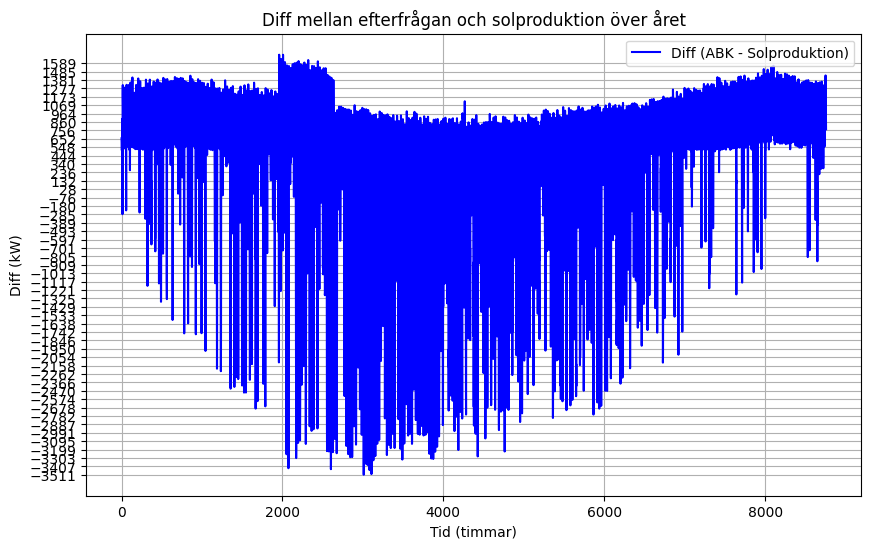


--- 칀r 1 Slut ---
Batterienergi kvar vid 친rets slut: 5000 kWh
Summa spotpris k칬pt el med batteri 친r 1: 3452249.793738731
Besparingar i spotpris 친r 1: 2237056.5063612703

--- 칀r 2 Slut ---
Batterienergi kvar vid 친rets slut: 5000 kWh
Summa spotpris k칬pt el med batteri 친r 2: 3522535.586994801
Besparingar i spotpris 친r 2: 2166770.7131052003


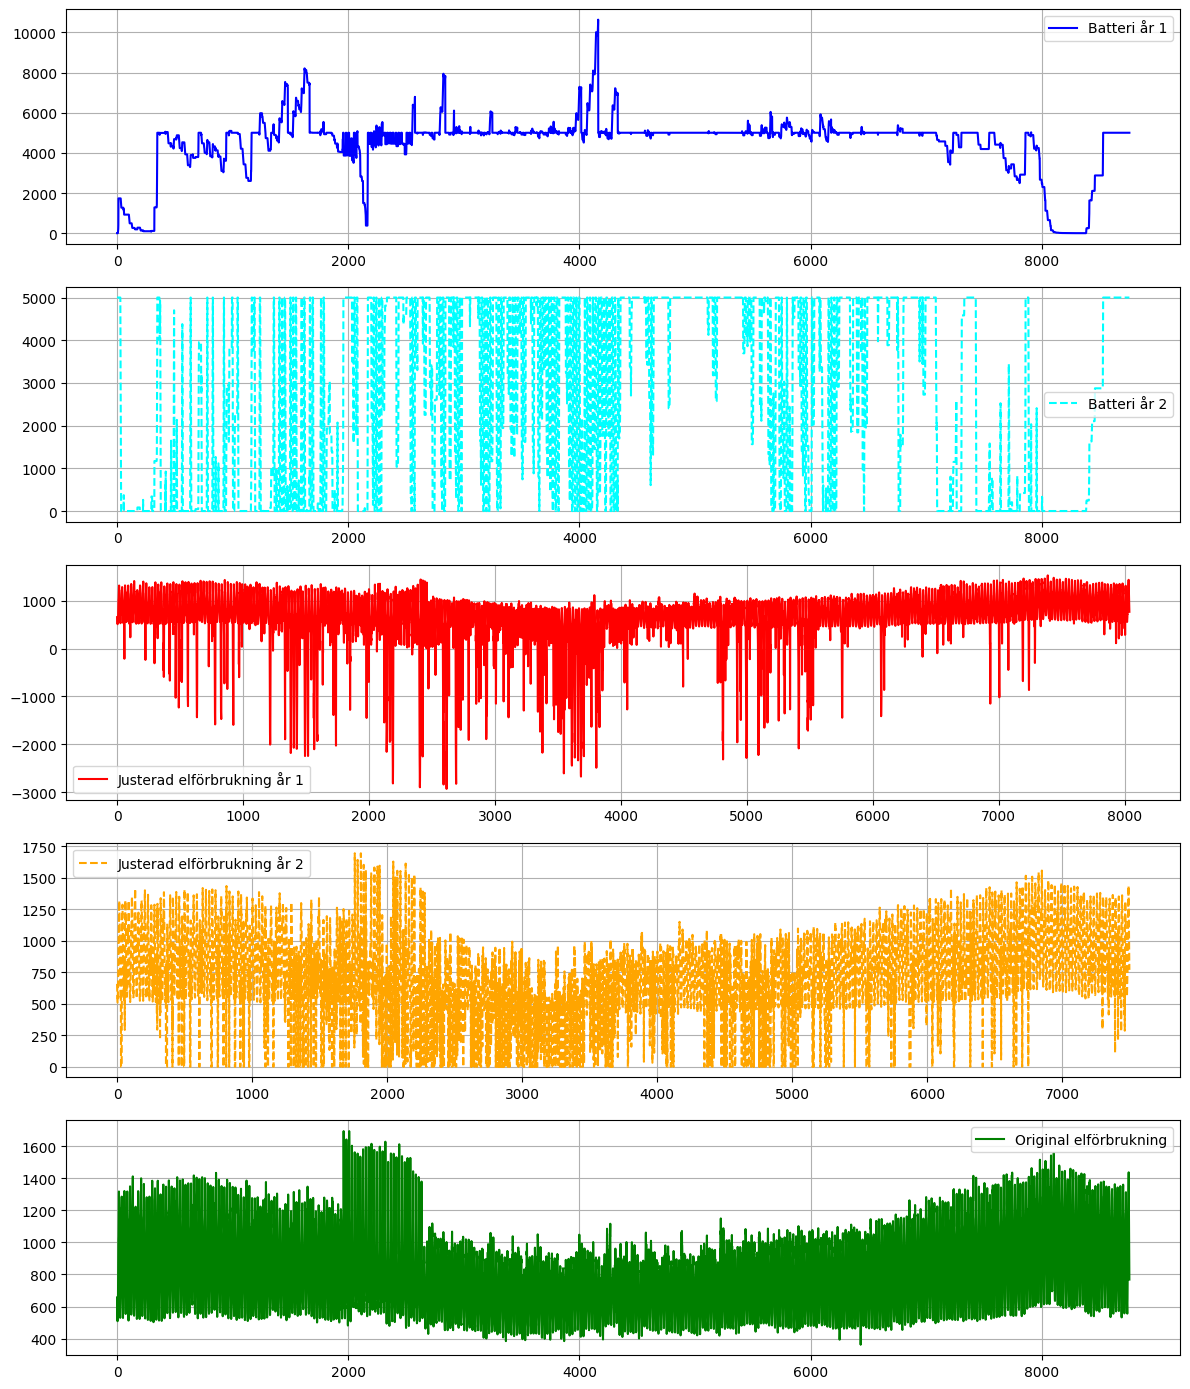

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel files
Solprod = pd.read_excel("SolprodABK.xlsx")
ABKEl = pd.read_excel("ABKEL.xlsx")
Spotpris = pd.read_excel("Spotpris.xlsx")

# Extract first columns from each
Sol = Solprod.iloc[:, 0] * 0.8  # Solar production with estimation of 80 % of roof can be covered with solar panels
ABK = ABKEl.iloc[:, 0]    # Electricity consumption
Spot = Spotpris.iloc[:, 0]  # Spot price

# Ta fram elf칬rbrukning (f칬rsta kolumnen) som en Pandas Series
elf칬rbrukning = pd.Series(ABKEl.iloc[:, 0])


# Sortera elf칬rbrukningen i fallande ordning och h칛mta de 30 h칬gsta v칛rdena
top_30_hours = elf칬rbrukning.sort_values(ascending=False).head(30)

# Skapa en DataFrame med radnummer (index) och v칛rde (elf칬rbrukning)
top_30_with_index = top_30_hours.reset_index()

# Byt namn p친 kolumnerna f칬r b칛ttre l칛sbarhet
top_30_with_index.columns = ['Timme', 'Elf칬rbrukning']

# Skriv ut de 30 timmarna med h칬gst elf칬rbrukning och radnummer
print("Original elf칬rbrukning topptimmar: " + top_30_with_index.to_string())

# Initialize Battery and Costs
batteriKapacitet = 0.0  # Start with an empty battery
batteriMaxKapacitet = 5000  # Max battery capacity in kWh
maxFr친nBatteri = 1500

#Variabler som anv칛nds i if-satser f칬r kontroll av extremv칛rden av effekttopparna
#maxf칬rbrukning_f칬r_lagring = 1480

h칬g_efterfr친gan_gr칛ns = 1480

medelh칬g_efterfr친gan_gr칛ns = 1400

# Total spot price without battery
SummaSpotpris2023 = (Spot * ABK).sum() / 100

# Lists to store values for plotting
elf칬rbrukning = []  # Adjusted electricity consumption for Year 1
elf칬rbrukning_index = [] #f칬r att h친lla r칛tt p친 indexeringen
timme = 0
battery_values = []  # Battery energy over time
original_consumption = ABK.tolist()  # Convert ABK to list for original consumption

# ----------------------- YEAR 1 SIMULATION -----------------------
K칬ptElSpotpris = 0.0  # Reset cost for Year 1


for sol, abk, spot in zip(Sol, ABK, Spot):
    diff = abk - sol  # Difference between consumption and solar production

    # Dynamisk justering av kapningsfaktor beroende p친 efterfr친gan
    if diff > h칬g_efterfr친gan_gr칛ns:  # Om efterfr친gan 칛r extremt h칬g
        faktor = 0.35  # Aggressiv kapning vid extrema toppar
    elif diff > medelh칬g_efterfr친gan_gr칛ns:  # Om efterfr친gan 칛r m친ttligt h칬g
        faktor = 0.15  # Medelh칬g kapning
    else:  # Om efterfr친gan 칛r l친g
        faktor = 0.1  # Mjukare kapning vid normal efterfr친gan

    # Update battery and electricity cost based on conditions
    if spot <= 35 and sol > 0 and diff < h칬g_efterfr친gan_gr칛ns:  # Store solar energy when spot price is low
        batteriKapacitet = min(batteriKapacitet + sol, batteriMaxKapacitet)
        K칬ptElSpotpris += spot * abk
        elf칬rbrukning.append(abk)
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif spot <= 35  and sol > 0 and diff >= h칬g_efterfr친gan_gr칛ns:
        energiFr친nBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFr친nBatteri)
        batteriKapacitet -= energiFr친nBatteri
        K칬ptElSpotpris += (diff - energiFr친nBatteri) * spot
        elf칬rbrukning.append(diff - energiFr친nBatteri)
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif 35 < spot < 100  and diff >= h칬g_efterfr친gan_gr칛ns:
        energiFr친nBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFr친nBatteri)
        batteriKapacitet -= energiFr친nBatteri
        K칬ptElSpotpris += (diff - energiFr친nBatteri) * spot
        elf칬rbrukning.append(diff - energiFr친nBatteri)
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen    
    elif spot <= 35  and diff < 0:
        batteriKapacitet = min(batteriKapacitet + (-diff), batteriMaxKapacitet)
    elif 35 < spot < 100 and sol > 0 and diff > 0:
        K칬ptElSpotpris += spot * diff
        elf칬rbrukning.append(diff)
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif spot >= 100 and sol > 0:
        energiFr친nBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFr친nBatteri)
        batteriKapacitet -= energiFr친nBatteri
        K칬ptElSpotpris += (diff - energiFr친nBatteri) * spot
        elf칬rbrukning.append(diff - energiFr친nBatteri)
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif spot > 35 and sol > 0 and diff < 0:
        batteriKapacitet = min(batteriKapacitet + (-diff), batteriMaxKapacitet)
    elif sol == 0 and spot >= 100 and diff > h칬g_efterfr친gan_gr칛ns:
        energiFr친nBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFr친nBatteri)
        batteriKapacitet -= energiFr친nBatteri
        K칬ptElSpotpris += (abk - energiFr친nBatteri) * spot
        elf칬rbrukning.append(max(0, abk - energiFr친nBatteri))
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen
    else:
        K칬ptElSpotpris += abk * spot
        elf칬rbrukning.append(abk)
        elf칬rbrukning_index.append(timme)  # Spara den ursprungliga timmen


    # 游늷 L칛gg till denna kontroll efter att batterikapaciteten uppdaterats
    if timme in [2152, 2128, 2129, 8104, 2153, 8080, 2104, 2105, 7984, 8032]:  
        print(f"Timme {timme}: Batterikapacitet = {batteriKapacitet}, Diff = {diff}, Spotpris = {spot}")
       
    battery_values.append(batteriKapacitet)
    timme += 1

# Konvertera elf칬rbrukning till en NumPy-array
elf칬rbrukning_array = np.array(elf칬rbrukning)
elf칬rbrukning_index_array = np.array(elf칬rbrukning_index)  # Skapa array av index

# Hitta de 30 h칬gsta v칛rdena i elf칬rbrukning
top_30_indices = np.argsort(elf칬rbrukning_array)[-30:]  # Index f칬r de 30 st칬rsta v칛rdena
top_30_values = elf칬rbrukning_array[top_30_indices]  # H칛mta v칛rdena
top_30_original_times = elf칬rbrukning_index_array[top_30_indices]  # H칛mta originaltimmar

# Sortera topp 30 i fallande ordning och beh친ll index
sorted_pairs = sorted(zip(top_30_values, top_30_original_times), reverse=True)

# Skriv ut de 30 h칬gsta v칛rdena tillsammans med originaltimmarna
print("De 30 h칬gsta elf칬rbrukningsv칛rdena och deras timmar i Excel-filen:")

for i, (value, original_time) in enumerate(sorted_pairs):
    excel_rad = original_time + 8  # +8 f칬r att Excel har rubrikrad och 1-baserade index
    print(f"{i+1}. Timme {original_time}  - F칬rbrukning: {value} (Excel rad: {excel_rad})")


# Skapa tomma listor f칬r att lagra timmar och diff-v칛rden
timmar = []
diff_lista = []

# Din stora for-loop d칛r du ber칛knar diff och andra parametrar
for timme, (sol, abk, spot) in enumerate(zip(Sol, ABK, Spot)):
    diff = abk - sol  # Skillnaden mellan efterfr친gan och solproduktion
    
    timmar.append(timme)  # L칛gg till timme
    diff_lista.append(diff)  # L칛gg till diff-v칛rdet

    # H칛r kan du ha dina if-satser och logik som tidigare
    # (F칬r att hantera batteriladdning, elk칬p etc.)

# Nu n칛r for-loopen har k칬rts klart, skapa plottningen en g친ng.
plt.figure(figsize=(10, 6))
plt.plot(timmar, diff_lista, label="Diff (ABK - Solproduktion)", color='blue')
plt.xlabel("Tid (timmar)")
plt.ylabel("Diff (kW)")
plt.title("Diff mellan efterfr친gan och solproduktion 칬ver 친ret")
plt.grid(True)
plt.legend()

# Justera y-axelns intervall
min_diff = min(diff_lista)
max_diff = max(diff_lista)
tick_interval = (max_diff - min_diff) / 50  # Dela upp i 10 sektioner (justera om beh칬vs)

plt.yticks(np.arange(min_diff, max_diff, tick_interval))  # S칛tt tickv칛rden

plt.show()

# Store battery energy left after year 1
battery_energy_end_of_year1 = batteriKapacitet
k칬ptEliKr_친r1 = K칬ptElSpotpris / 100
besparingar_친r1 = SummaSpotpris2023 - k칬ptEliKr_친r1

print("\n--- 칀r 1 Slut ---")
print("Batterienergi kvar vid 친rets slut:", battery_energy_end_of_year1, "kWh")
print("Summa spotpris k칬pt el med batteri 친r 1:", k칬ptEliKr_친r1)
print("Besparingar i spotpris 친r 1:", besparingar_친r1)

# ----------------------- YEAR 2 SIMULATION -----------------------
batteriKapacitet = battery_energy_end_of_year1  # Start Year 2 with leftover battery energy
K칬ptElSpotpris = 0.0  # Reset for Year 2
elf칬rbrukning_year2 = []
battery_values_year2 = []

for sol, abk, spot in zip(Sol, ABK, Spot):
    diff = abk - sol

    if spot <= 35 and sol > 0:
        batteriKapacitet = min(batteriKapacitet + sol, batteriMaxKapacitet)
        K칬ptElSpotpris += spot * abk
        elf칬rbrukning_year2.append(abk)
    elif 35 < spot < 100 and sol > 0 and diff > 0:
        K칬ptElSpotpris += spot * diff
        elf칬rbrukning_year2.append(diff)
    elif spot >= 100 and sol > 0 and diff > 0 and batteriKapacitet > 0:
        energiFr친nBatteri = min(batteriKapacitet, diff, maxFr친nBatteri)
        batteriKapacitet -= energiFr친nBatteri
        K칬ptElSpotpris += (diff - energiFr친nBatteri) * spot
        elf칬rbrukning_year2.append(diff - energiFr친nBatteri)
    elif spot > 35 and sol > 0 and diff < 0:
        batteriKapacitet = min(batteriKapacitet + (-diff), batteriMaxKapacitet)
    elif sol == 0 and batteriKapacitet > 0 and spot >= 100:
        energiFr친nBatteri = min(batteriKapacitet, abk, maxFr친nBatteri)
        batteriKapacitet -= energiFr친nBatteri
        K칬ptElSpotpris += (abk - energiFr친nBatteri) * spot
        elf칬rbrukning_year2.append(max(0, abk - energiFr친nBatteri))
    else:
        K칬ptElSpotpris += abk * spot
        elf칬rbrukning_year2.append(abk)

    battery_values_year2.append(batteriKapacitet)

k칬ptEliKr_친r2 = K칬ptElSpotpris / 100
besparingar_친r2 = SummaSpotpris2023 - k칬ptEliKr_친r2

print("\n--- 칀r 2 Slut ---")
print("Batterienergi kvar vid 친rets slut:", batteriKapacitet, "kWh")
print("Summa spotpris k칬pt el med batteri 친r 2:", k칬ptEliKr_친r2)
print("Besparingar i spotpris 친r 2:", besparingar_친r2)

# ----------------------- PLOTTING RESULTS -----------------------
fig, ax = plt.subplots(5, 1, figsize=(12, 14))

ax[0].plot(battery_values, label='Batteri 친r 1', color='blue')
ax[1].plot(battery_values_year2, label='Batteri 친r 2', color='cyan', linestyle='dashed')
ax[2].plot(elf칬rbrukning, label='Justerad elf칬rbrukning 친r 1', color='red')
ax[3].plot(elf칬rbrukning_year2, label='Justerad elf칬rbrukning 친r 2', color='orange', linestyle='dashed')
ax[4].plot(original_consumption, label='Original elf칬rbrukning', color='green')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

